In [ ]:
WA_Fn-UseC_-HR-Employee-Attrition

# HR Analytics Project- Understanding the Attrition in HR

## Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score

In [5]:
hr_ds = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
hr_ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
hr_ds.sample(10)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
52,44,No,Travel_Rarely,1488,Sales,1,5,Marketing,1,68,...,3,80,1,9,2,2,4,3,1,3
156,51,No,Travel_Rarely,1169,Research & Development,7,4,Medical,1,211,...,3,80,0,10,2,3,1,0,0,0
333,43,No,Travel_Rarely,1001,Research & Development,7,3,Life Sciences,1,451,...,1,80,1,10,1,2,1,0,0,0
33,39,Yes,Travel_Rarely,895,Sales,5,3,Technical Degree,1,42,...,3,80,1,19,6,4,1,0,0,0
1307,28,No,Travel_Rarely,1217,Research & Development,1,3,Medical,1,1834,...,3,80,1,3,3,3,3,2,1,2
689,20,Yes,Travel_Rarely,129,Research & Development,4,3,Technical Degree,1,960,...,2,80,0,1,2,3,1,0,0,0
1445,41,No,Travel_Rarely,582,Research & Development,28,4,Life Sciences,1,2034,...,3,80,1,21,3,3,20,7,0,10
207,36,No,Travel_Frequently,635,Research & Development,18,1,Medical,1,286,...,1,80,0,8,2,3,8,1,1,7
236,33,Yes,Travel_Rarely,465,Research & Development,2,2,Life Sciences,1,328,...,1,80,0,13,3,4,9,7,1,7
511,36,No,Travel_Rarely,913,Research & Development,9,2,Medical,1,699,...,3,80,1,13,2,3,3,2,0,2


In [7]:
hr_ds.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [8]:
hr_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
missing_val = {}
for i in hr_ds.columns:
    if hr_ds[i].isnull().sum() >0:
        missing_val[i] = hr_dds[i].isnull().sum()
print(missing_val)

{}


In [11]:
object_columns =  hr_ds.select_dtypes(include ="object")
num_col = hr_ds.select_dtypes(exclude ="object")
print("object_columns count",object_columns.shape[1])
print("number columns count",num_col.shape[1])

object_columns count 9
number columns count 26


We have 35 columns in the data with 1470 observations. I have checked missing value as well anf found that there are no missing value.We have 9 obejct columns and 26 numeric cols.

In [12]:
hr_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In above stats information, there are mix of features pure numeric in nature and some are categorical feature. a few columns like Age, Daily rates are almost normally distributed,<><><><< Distance from home is left skewed. Monthly rate is right skewed.

In [13]:
object_columns.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


in target class NO which means no attrition count is high as compared to Yes. we will see that thought visulizationn. it has 3 departments, educationfiled are 9, maximum people are working in R&D department.All are over18, this columns has only one value for everyone and we can delete it. approx 72% people dont do overtime.

No     1233
Yes     237
Name: Attrition, dtype: int64 



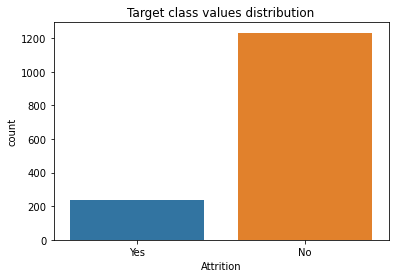

In [14]:
# checking Target colums values
print(hr_ds["Attrition"].value_counts(),"\n")
sns.countplot(hr_ds["Attrition"])
plt.title("Target class values distribution");

As seen in the describe analysis, it is matter of imbalance data that we will treat it by using up sampling methods
lets do more analysis

In [16]:
hr_ds.groupby("Attrition")[["Age","DailyRate","DistanceFromHome","HourlyRate","MonthlyIncome","MonthlyRate","PercentSalaryHike","TrainingTimesLastYear","TotalWorkingYears","YearsWithCurrManager"]].mean()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TrainingTimesLastYear,TotalWorkingYears,YearsWithCurrManager
Attrition,,,,,,,,,,
No,37.561233,812.504461,8.915653,65.952149,6832.739659,14265.779400,15.231144,2.832928,11.862936,4.367397
Yes,33.607595,750.362869,10.632911,65.573840,4787.092827,14559.308017,15.097046,2.624473,8.244726,2.852321


Peole who left or attrited, their average age is less than people who didnt not attrite. we see differene in their daily rates also. attrited people were getting less rate as compared to other.People who attrited,their average working year was also good.
we see huge diffeent in montly income, they average income low as compared to not attrited, difference may be observed because of new hiring.

Text(0.5, 1.0, 'BusinessTravel wise attrition')

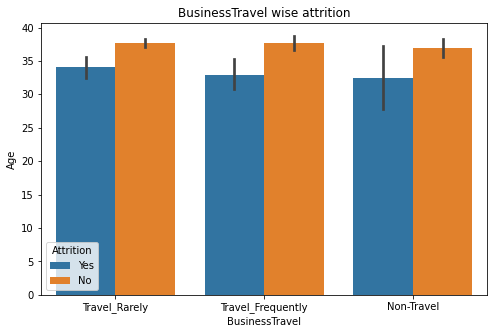

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x="BusinessTravel", y = "Age", data = hr_ds,hue = "Attrition")
plt.title("BusinessTravel wise attrition")

There is no impact of travelling on attrition

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


<AxesSubplot:ylabel='Department,Attrition'>

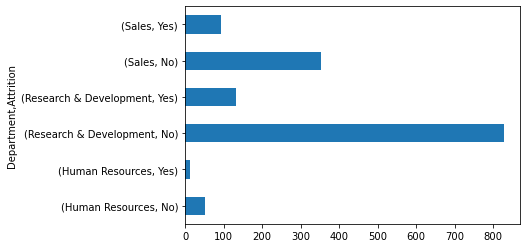

In [18]:
print(hr_ds["Department"].value_counts())
hr_ds.groupby(["Department","Attrition"])["Attrition"].count().plot(kind = "barh")

R&D department frequency is more in the data thus we see more number of attrition in R&D department. lets check the departmment wise stats

<AxesSubplot:xlabel='Attrition,EducationField'>

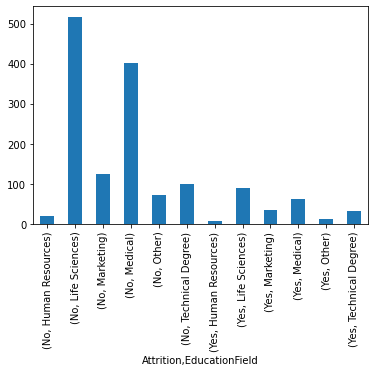

In [19]:
hr_ds.groupby(["Attrition","EducationField"])["Attrition"].count().plot(kind = "bar")

high attrition observed in life science and medical department 

since distance columns range is wide, i want to check the attrition rate distance wise so have created bins.
i have created a seprated data for analysis purpose 

In [21]:
distance = pd.cut(hr_ds["DistanceFromHome"],bins = 5)
for_analysis = pd.concat([hr_ds["Attrition"],distance], axis =1, join = "inner")

<AxesSubplot:ylabel='Attrition,DistanceFromHome'>

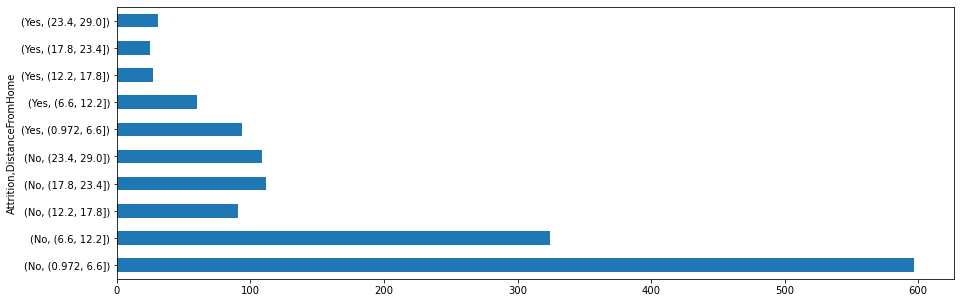

In [22]:
plt.figure(figsize=(15,5))
for_analysis.groupby(["Attrition","DistanceFromHome"])["Attrition"].count().plot(kind = "barh")

<AxesSubplot:ylabel='Attrition,DistanceFromHome'>

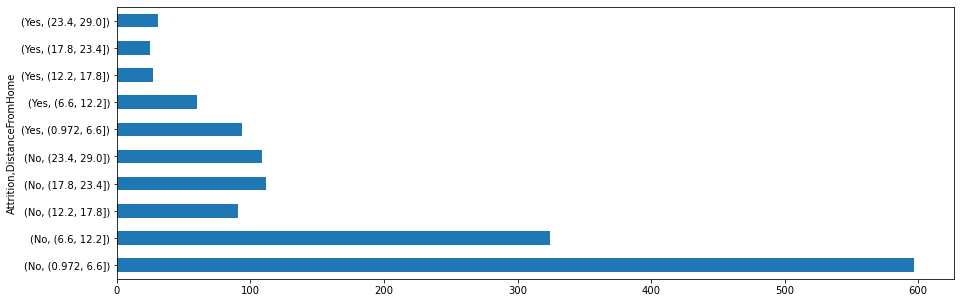

In [23]:
plt.figure(figsize=(15,5))
for_analysis.groupby(["Attrition","DistanceFromHome"])["Attrition"].count().plot(kind = "barh")

it has been observed that people attrition who had less distance. maximum attrition observation between 1 to 12 KM.

"Education<br>\n1 'Below College'\n2 'College'\n3 'Bachelor'\n4 'Master'\n5 'Doctor'"

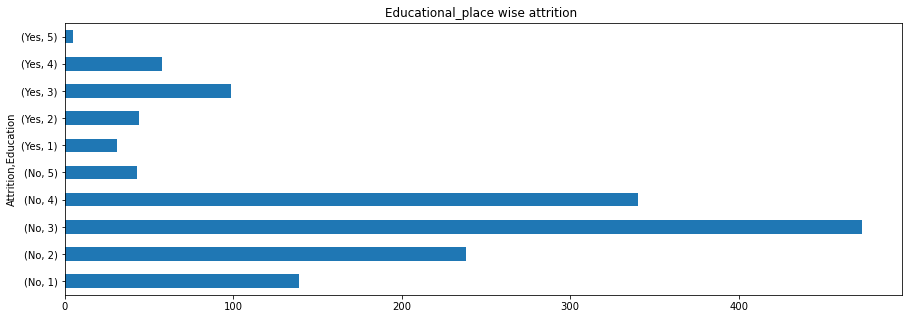

In [24]:
plt.figure(figsize=(15,5))
hr_data.groupby(["Attrition","Education"])["Attrition"].count().plot(kind = "barh")
plt.title("Educational_place wise attrition ")
"""Education<br>
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'"""

Becholar and master have high attrition. there could be a reason that number of employee are more from these two category

"EnvironmentSatisfaction\n1 'Low'\n2 'Medium'\n3 'High'\n4 'Very High'"

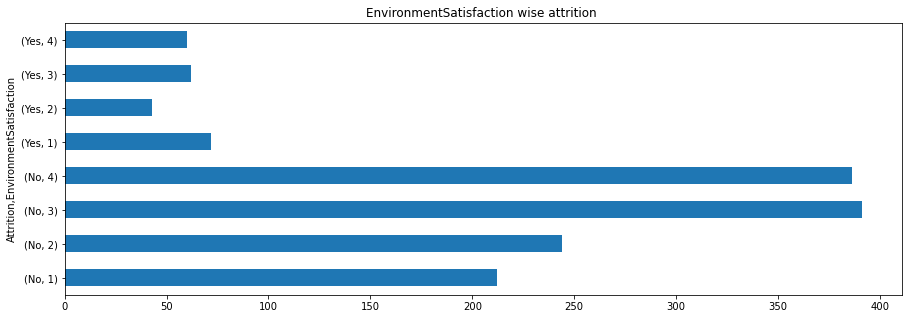

In [25]:
plt.figure(figsize=(15,5))
hr_data.groupby(["Attrition","EnvironmentSatisfaction"])["EnvironmentSatisfaction"].count().plot(kind = "barh")
plt.title("EnvironmentSatisfaction wise attrition ");

"""EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'"""

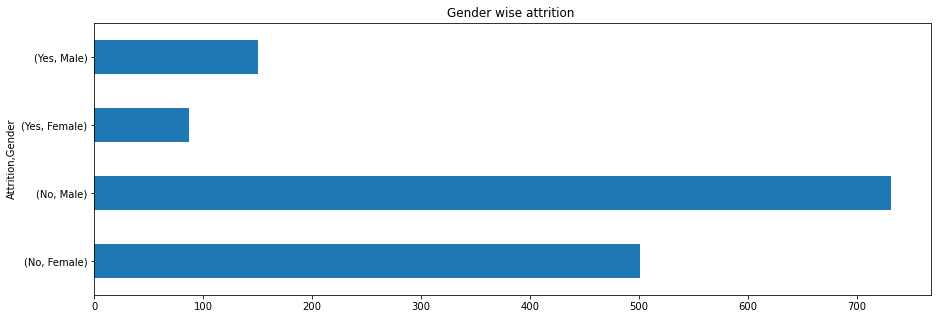

In [26]:
plt.figure(figsize=(15,5))
hr_data.groupby(["Attrition","Gender"])["Gender"].count().plot(kind = "barh")
plt.title("Gender wise attrition ");